In [1]:
#结合focal loss 函数讲解

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

print(tf.__version__)
print(np.__version__)




# 数据集简介

In [2]:
mnist = np.load("mnist.npz")
x_train, y_train, x_test, y_test = mnist['x_train'],mnist['y_train'],mnist['x_test'],mnist['y_test']



In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

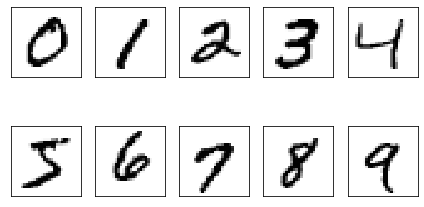

In [7]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
 
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [8]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [9]:

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)


In [ ]:
#类的实现

In [13]:
# #多分类的focal loss 损失函数
# class FocalLoss(tf.keras.losses.Loss):

#     def __init__(self,gamma=2.0,alpha=0.25):
#         self.gamma = gamma
#         self.alpha = alpha
#         super(FocalLoss, self).__init__()

#     def call(self,y_true,y_pred):
#         y_pred = tf.nn.softmax(y_pred,axis=-1)
#         epsilon = tf.keras.backend.epsilon()#1e-7
#         y_pred = tf.clip_by_value(y_pred, epsilon, 1.0)
        
       
#         y_true = tf.cast(y_true,tf.float32)
        
#         loss = -  y_true * tf.math.pow(1 - y_pred, self.gamma) * tf.math.log(y_pred)
        
#         loss = tf.math.reduce_sum(loss,axis=1)
#         return loss
    

In [ ]:
#函数的实现

In [11]:
def FocalLoss(gamma=2.0,alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.nn.softmax(y_pred,axis=-1)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0)

        y_true = tf.cast(y_true,tf.float32)

        loss = -  y_true * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred)

        loss = tf.math.reduce_sum(loss,axis=1)
        return  loss
    return focal_loss_fixed

In [12]:

model = MyModel()

#loss_object = tf.keras.losses.CategoricalCrossentropy()
loss_object = FocalLoss(gamma=2.0,alpha=0.25)

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)


@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)



In [13]:
EPOCHS = 5
for epoch in range(EPOCHS):
    # 在下一个epoch开始时，重置评估指标
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100))



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 1.0062854290008545, Accuracy: 88.1866683959961, Test Loss: 0.899224042892456, Test Accuracy: 97.05000305175781
Epoch 2, Loss: 0.8931533098220825, Accuracy: 97.54166412353516, Test Loss: 0.8904874920845032, Test Accuracy: 97.68000030517578
Epoch 3, Loss: 0.8832218647003174, Accuracy: 98.30166625976562, Test Loss: 0.8857290744781494, Test Accuracy: 98.02999877929688
Epoch 4, Loss: 0.879651665687561, Accuracy: 98.54666900634766, Test Loss: 0.8816375732421875, Test Accuracy: 98.4000015258789
